# Experimental Setup

* AIM : To compare primal and dual SVM implementations
* Dataset: ADULT dataset from UCI ML repository
* CPU :            i7 2.3 GHz
* Operating System: Ubuntu 12.10 64 bit
* RAM: 8 GB
* Python version: 2.7
* Scikit-learn version: .13
* IPython version: .13
* IPython Number of Kernels used: 8



# Data Preprocessing

## Data Loading

* We use Numpy's built in method to load the data from txt file. 
* We also specify various column headers in **data_headers**.

In [1]:
import numpy as np

data_headers=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain'\
              ,'capital_loss','hours_per_week','native_country','salary']

In [2]:
data=np.array(np.genfromtxt('dataset.txt', dtype=(int, 'S32',int, 'S32',int,'S32'\
,'S32','S32','S32','S32',int,int,int,'S32','S32'),delimiter=',',autostrip=True,names=data_headers))





* We now see the shape of the matrix obtained.

In [3]:
data.shape

(32561,)

## Handling Missing Values

* We Deleting all the rows which contain '?' or missing values.
* This could have also been done by replacing the missing value by the most common value in that column (for categorical attributes) or averaging (for continuous attributes).

In [4]:
row_idx_to_delete=[]
for i in range(0,len(data)):
    if "?" in data[i]:
        row_idx_to_delete.append(i)

print len(row_idx_to_delete)," records have incomplete data and will be deleted"
data=np.delete(data,row_idx_to_delete)


2399  records have incomplete data and will be deleted


## Converting Attributes to Discrete Type

* Firstly, we plot the histogram for **age** to find out where to split.

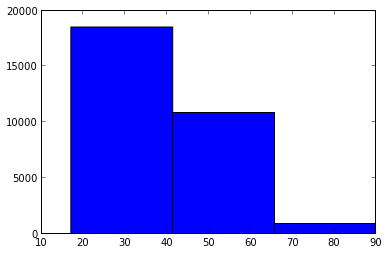

In [5]:
hist(data['age'],3);

From the histogram, we observe that the attribute **age** can be split as follows:

* 0:    age<30            
* 1:    age>=30 and age<=55
* 2:    age>=55      


In [6]:
idx_age_0=data['age']<30
idx_age_1=(data['age']>=30) & (data['age']<=55)
idx_age_2=data['age']>55



data['age'][idx_age_0]=0
data['age'][idx_age_1]=1
data['age'][idx_age_2]=2



* Next for **workclass** attribute we convert categorical quantities into numerical quantities.

In [7]:
workclass_attributes=["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",\
 "Local-gov", "State-gov", "Without-pay", "Never-worked"]
idx_workclass={}
for workclass in workclass_attributes:
    idx_workclass[workclass]=data["workclass"]==workclass

#Converting the datatype to integer now
for i in range(0,len(workclass_attributes)):
    data["workclass"][idx_workclass[workclass_attributes[i]]]=int(i)

* **Fnlwgt** is a continuous attribute. We plot it to estimate a numerical range (since we are not doing regression).

([105702.5,
  289569.5,
  473436.5,
  657303.5,
  841170.5,
  1025037.5,
  1208904.5,
  1392771.5],
 array([18283, 10410,  1291,   142,    21,     7,     5,     3]))

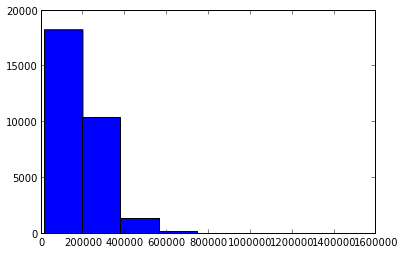

In [8]:
a=hist(data['fnlwgt'],8)
means=[(a[1][i]+a[1][i+1])/2.0 for i in range(0,len(a[1])-1)]
means,a[0]

Thus the attribute can be split as follows:

* 0:    fnlwgt<=105702
* 1:    fnlwgt>105702 and fnlwgt<=289569
* 2:    fnlwgt>289569

In [9]:
idx_wgt_0=data['fnlwgt']<=105702
idx_wgt_1=(data['fnlwgt']>=105702) & (data['fnlwgt']<=289569) 
idx_wgt_2=data['fnlwgt']>=289569


data['fnlwgt'][idx_wgt_0]=0
data['fnlwgt'][idx_wgt_1]=1
data['fnlwgt'][idx_wgt_2]=2


* **Education** is a categorical attribute and is here converted to numerical attribute.

In [10]:
education_attributes=["Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc"\
, "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"]

In [11]:
idx_education={}
for education in education_attributes:
    idx_education[education]=data["education"]==education

#Converting the datatype to integer now

for i in range(0,len(education_attributes)):
    data["education"][idx_education[education_attributes[i]]]=int(i)

* **Education number** is a continuous numeric attribute.

([2.875, 6.625, 10.375, 14.125], array([ 1041,  2700, 18833,  7588]))

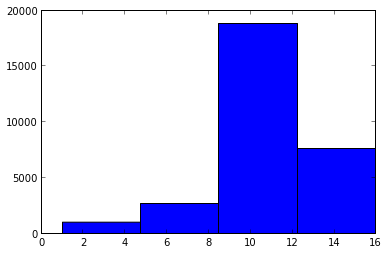

In [13]:
a=hist(data['education_num'],4)
means=[(a[1][i]+a[1][i+1])/2.0 for i in range(0,len(a[1])-1)]
means,a[0]

Thus, the attribute can be split as follows:

* 0:    education_num<2.9
* 1:    education_num>2.9 and education_num<=6.7
* 2:    education_num>6.7 and education_num<=10.4
* 3:    education_num>10.4

In [14]:
idx_enum_0=data['education_num']<=means[0]
idx_enum_1=(data['education_num']>means[0]) & (data['education_num']<=means[1]) 
idx_enum_2=(data['education_num']>=means[1]) & (data['education_num']<=means[2])
idx_enum_3=data['education_num']>means[2]


data['education_num'][idx_enum_0]=0
data['education_num'][idx_enum_1]=1
data['education_num'][idx_enum_2]=2
data['education_num'][idx_enum_3]=3


* Similarly for all other datatypes we perform similar conversion.

In [15]:
marital_status_attributes=['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed',\
 'Married-spouse-absent','Married-AF-spouse']


In [16]:
idx_marital_status={}
for marital_status in marital_status_attributes:
    idx_marital_status[marital_status]=data["marital_status"]==marital_status

#Converting the datatype to integer now

for i in range(0,len(marital_status_attributes)):
    data["marital_status"][idx_marital_status[marital_status_attributes[i]]]=int(i)

In [17]:
occupation_attributes=['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',\
 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']

In [18]:
idx_occupation={}
for occupation in occupation_attributes:
    idx_occupation[occupation]=data["occupation"]==occupation

#Converting the datatype to integer now

for i in range(0,len(occupation_attributes)):
    data["occupation"][idx_occupation[occupation_attributes[i]]]=int(i)

In [19]:
relationship_attributes=['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']

In [20]:
idx_relationship={}
for relationship in relationship_attributes:
    idx_relationship[relationship]=data["relationship"]==relationship

#Converting the datatype to integer now

for i in range(0,len(relationship_attributes)):
    data["relationship"][idx_relationship[relationship_attributes[i]]]=int(i)

In [21]:
race_attributes=['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']

In [22]:
idx_race={}
for race in race_attributes:
    idx_race[race]=data["race"]==race

#Converting the datatype to integer now

for i in range(0,len(race_attributes)):
    data["race"][idx_race[race_attributes[i]]]=int(i)

In [23]:
sex_attributes=['Female', 'Male']


In [24]:
idx_sex={}
for sex in sex_attributes:
    idx_sex[sex]=data["sex"]==sex

#Converting the datatype to integer now

for i in range(0,len(sex_attributes)):
    data["sex"][idx_sex[sex_attributes[i]]]=int(i)

([24999.75, 74999.25], array([30014,   148]))

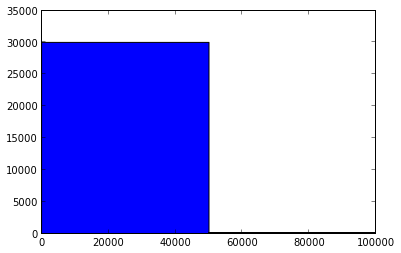

In [25]:
a=hist(data['capital_gain'],2)
means=[(a[1][i]+a[1][i+1])/2.0 for i in range(0,len(a[1])-1)]
means,a[0]

In [26]:
idx_cap_gain_0=data['capital_gain']<=means[0]
idx_cap_gain_1=(data['capital_gain']>means[0]) & (data['capital_gain']<=means[1]) 


data['capital_gain'][idx_cap_gain_0]=0
data['capital_gain'][idx_cap_gain_1]=1


([1089.0, 3267.0], array([29955,   207]))

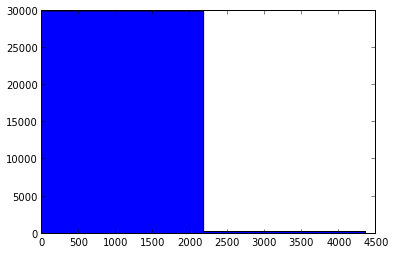

In [27]:
a=hist(data['capital_loss'],2)
means=[(a[1][i]+a[1][i+1])/2.0 for i in range(0,len(a[1])-1)]
means,a[0]

In [28]:
idx_cap_loss_0=data['capital_loss']<=means[0]
idx_cap_loss_1=(data['capital_loss']>means[0]) & (data['capital_loss']<=means[1]) 


data['capital_loss'][idx_cap_loss_0]=0
data['capital_loss'][idx_cap_loss_1]=1

([13.25, 37.75, 62.25, 86.75], array([ 3261, 20708,  5798,   395]))

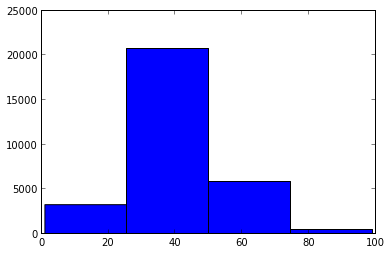

In [29]:
a=hist(data['hours_per_week'],4)
means=[(a[1][i]+a[1][i+1])/2.0 for i in range(0,len(a[1])-1)]
means,a[0]

In [30]:
idx_hours_0=data['hours_per_week']<=means[0]
idx_hours_1=(data['hours_per_week']>means[0]) & (data['hours_per_week']<=means[1]) 
idx_hours_2=(data['hours_per_week']>=means[1]) & (data['hours_per_week']<=means[2])
idx_hours_3=data['hours_per_week']>means[2]


data['hours_per_week'][idx_hours_0]=0
data['hours_per_week'][idx_hours_1]=1
data['hours_per_week'][idx_hours_2]=2
data['hours_per_week'][idx_hours_3]=3


In [31]:
native_country_attributes=['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)'\
,'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam'
, 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala',
'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']

In [32]:
idx_native_country={}
for native_country in native_country_attributes:
    idx_native_country[native_country]=data["native_country"]==native_country

#Converting the datatype to integer now

for i in range(0,len(native_country_attributes)):
    data["native_country"][idx_native_country[native_country_attributes[i]]]=int(i)

In [33]:
salary_attributes=['<=50K','>50K']


In [34]:
idx_salary={}
for salary in salary_attributes:
    idx_salary[salary]=data["salary"]==salary

#Converting the datatype to integer now

for i in range(0,len(salary_attributes)):
    data["salary"][idx_salary[salary_attributes[i]]]=int(i)

* We save the filtered data after converting into numerical discrete quantities for each attribute.

In [35]:
np.savetxt('filtered.txt',data,fmt="%s",delimiter=',')


## Scaling Data

* SVM literature suggests that using attribute values with zero mean will improve the performance. We use **scikit-learn's** preprocessing module for the same.
* From this filtered data, we now need to make a training and a test set. Since my roll number ends in 09, i shall use 9% of data as training set and the remaining as test set. Since the proportion of training data is very less in comparison to test data, the results are bound to be not too good.

In [3]:
from sklearn import preprocessing

In [4]:
filtered_data=np.array(np.genfromtxt('filtered.txt', delimiter=',',autostrip=True))

In [5]:
scaled_filtered_data=preprocessing.scale(filtered_data)

In [6]:
salary=scaled_filtered_data[:,14]
scaled_filtered_data=scaled_filtered_data[:,:-1]


In [7]:
print salary

[-0.57569132 -0.57569132 -0.57569132 ..., -0.57569132 -0.57569132
  1.73704199]


* We now see the obtained shape of the **filtered scaled** data.

In [8]:
print scaled_filtered_data.shape

(30162, 14)


* For the **Y** attribute, which is in our case salary, we set it to 1 and -1 according to positive and negative class.

In [9]:
from sklearn import svm
salary2=np.array([-1]*len(salary))
for i in range(0,len(salary2)):
    if salary[i]>0:
        salary2[i]=1


## Paritioning data into test and train set

* 9% of data is randomly chosen for **training** and the remainig is chosen for **testing**.

In [15]:
import random,math
training_size_fraction=.09
test_idx=np.array(random.sample(xrange(len(salary2)), int((1-training_size_fraction)*len(salary2))))
train_idx=np.array([x for x in xrange(len(salary2)) if x not in test_idx])
test_samples=scaled_filtered_data[test_idx]
train_samples=scaled_filtered_data[train_idx]
test_out=salary2[test_idx]
train_out=salary2[train_idx]

## Results using SMO based LibSVM implementation in Scikit Learn

* We use a **linear** kernel.
* We use Python's **time** module to find the time consumed.
* It is based on SMO.

In [17]:
import time


In [29]:
clf = svm.SVC(kernel='linear')
libsvm_start=time.time()

In [30]:
clf.fit(train_samples, train_out)
libsvm_train_end=time.time()

In [31]:
a=np.array(clf.predict(test_samples).astype(int))
libsvm_test_end=time.time()
c=a==np.array(test_out)
c=np.array(a)==np.array(test_out)


In [35]:
print "Accuracy                                    : ",str(sum(c)*100.0/len(a))+" %"
print "Number of support vectors for positive class: ",clf.n_support_[0]
print "Number of support vectors for negative class: ",clf.n_support_[1]
print "Time Required for training                  : ",str(libsvm_train_end-libsvm_start)+" s"
print "Time Required for testing                   : ",str(libsvm_test_end-libsvm_train_end)+" s"


Accuracy                                    :  81.2839290269 %
Number of support vectors for positive class:  606
Number of support vectors for negative class:  595
Time Required for training                  :  0.947898864746 s
Time Required for testing                   :  1.50630402565 s


# Results using Dual form based SVMlight implementation provided by the SVMlight authors.

* SVM Light requires data to be in a specific format and that is what is being done in the next step. We create a **test.dat** and **train.dat** accordingly.
* Moreover, we compile the **svmlight** binaries and call them as executables from Python program using subprocess module.
* SVMLight is based on working set selection (steepest feasible descent). 

In [50]:
test_data_string=""
for i in range(0,len(test_out)):
    if test_out[i]==1:
        c='+1'
    else:
        c='-1'
    test_data_string=test_data_string+c
    for j in range(0,14):
        test_data_string=test_data_string+" "+str(j+1)+":"+str(test_samples[i][j])
    test_data_string=test_data_string+"\n"
f=open('test.dat','w')
f.write(test_data_string)
        

In [51]:
train_data_string=""
for i in range(0,len(train_out)):
    if train_out[i]==1:
        c='+1'
    else:
        c='-1'
    train_data_string=train_data_string+c
    for j in range(0,14):
        train_data_string=train_data_string+" "+str(j+1)+":"+str(train_samples[i][j])
    train_data_string=train_data_string+"\n"
f=open('train.dat','w')
f.write(train_data_string)

In [36]:
import subprocess

In [37]:
svmlight_start=time.time()
p = subprocess.Popen('./svm_learn train.dat model', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
svmlight_train_end=time.time()
train_output= p.stdout.readlines()

In [38]:
p = subprocess.Popen('./svm_classify test.dat model', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
svmlight_test_end=time.time()
test_output= p.stdout.readlines()

In [39]:
test_output

['Reading model...OK. (1262 support vectors read)\n',
 'Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..147

In [40]:
train_output

['Scanning examples...done\n',
 'Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..OK. (2715 examples read)\n',
 'Setting default regularization parameter C=0.0886\n',
 'Optimizing..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [42]:
print "Accuracy                                    : ",str(81.62)+" %"
print "Number of support vectors                   :  1262" 
print "Time Required for training                  : ",str(svmlight_train_end-svmlight_start)+" s"
print "Time Required for testing                   : ",str(svmlight_test_end-svmlight_train_end)+" s"

Accuracy                                    :  81.62 %
Number of support vectors                   :  1262
Time Required for training                  :  0.0196049213409 s
Time Required for testing                   :  0.980164051056 s


# Results using Primal form based Pegasos implementation

* Optimization Technique Used: SGD
* Since the code provided by the authors did not talk about Support Vectors, i chose to implement the algorithm on my own in Python.
* Caveat: One small routine is not vectorized and in thus taking a major chunk of the time.
* We choose the following parameters as default:
    * **k**: 10% of training data
    * **T**: 1000
    * **Lambda**: 1

In [91]:
import pegasos
pegasos_start_time=time.time()
weight_vector,bias,sv_array=pegasos.train(train_samples,train_out,1,1000)
pegasos_train_end=time.time()
classification=pegasos.test(test_samples,test_out,a,b)
pegasos_test_end=time.time()


In [93]:
f=-1*ones(len(classification))
idxz=classification>0
f[idxz]=1
f=f.astype(int)

In [94]:
print "Accuracy                                    : ",str(100.0*sum(f==test_out)/len(test_out))+"%"
print "Number of support vectors                   : ",len(sv_array[(sv_array<.1) & (sv_array>-0.1)]) 
print "Time Required for training                  : ",str(pegasos_train_end-pegasos_start_time)+" s"
print "Time Required for testing                   : ",str(pegasos_test_end-pegasos_train_end)+" s"

Accuracy                                    :  77.5239552592%
Number of support vectors                   :  266
Time Required for training                  :  0.437710046768 s
Time Required for testing                   :  0.0149388313293 s


## Who is the winner?

### Training Time

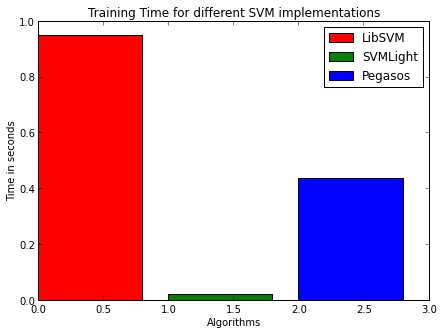

In [133]:
figsize(7,5)
bar(0,0.947898864746,label='LibSVM',color='r')
bar(1,0.0196049213409,label='SVMLight',color='g')
bar(2,0.437710046768,label='Pegasos');
legend()
ylabel("Time in seconds")
xlabel("Algorithms");
title("Training Time for different SVM implementations");

### Testing Time

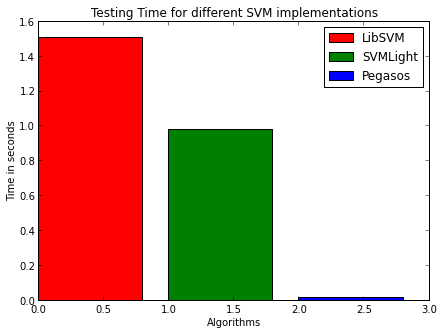

In [134]:
bar(0,1.50630402565,label='LibSVM',color='r')
bar(1,0.980164051056,label='SVMLight',color='g')
bar(2,0.0149388313293,label='Pegasos');
legend()
ylabel("Time in seconds")
xlabel("Algorithms");
title("Testing Time for different SVM implementations");

### Accuracy

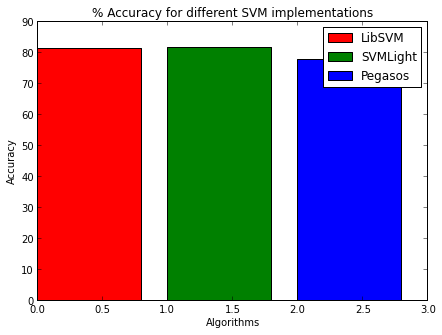

In [135]:
bar(0,81.2839290269,label='LibSVM',color='r')
bar(1,81.62,label='SVMLight',color='g')
bar(2,77.5239552592,label='Pegasos');
legend()
ylabel("Accuracy")
xlabel("Algorithms");

title("% Accuracy for different SVM implementations");

### Number of Support Vectors

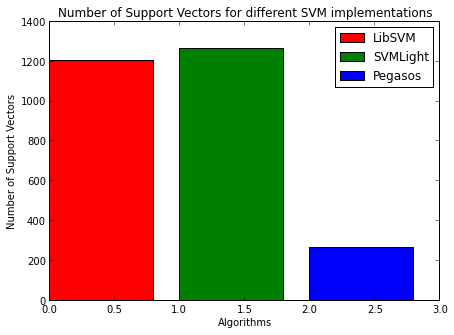

In [137]:
bar(0,1201,label='LibSVM',color='r')
bar(1,1262,label='SVMLight',color='g')
bar(2,266,label='Pegasos');
legend()
ylabel("Number of Support Vectors")
xlabel("Algorithms");

title("Number of Support Vectors for different SVM implementations");

### Theoretical comparison

In [140]:
from IPython.display import Image
Image(filename='svm.png');

## Similarities

* Working set selection and active set selection are both optimization tecniques used to optimize the SVM optimization problem and in general optimization problems. Sequential minimal optimization is one of the working set techniques.
* Both the algorithms are iterative in nature. 
* Both the algorithms try to find which constraints would influence the final optimization result.

## Differences

* As we can see from the above diagram, Active set selection is recommended to be used for medium size datasets. In contrast for large datasets, working set selection tecniques are recommended.
* Memory complexity is $$O(n^2)$$, whereas for SMO it is $$O(n)$$
* SMO chooses the constraints which violate KKT conditions and Active set selection strategy starts with a point satisfying the equality condition.